In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wstępna analiza

In [2]:
with open("./Zbiór danych Titanic.arff", "r") as f:
    headers = f.read()

columns = [header.split()[1].strip("'") for header in headers.split("\n") if header.lower().startswith("@attribute")]
titanic_df = pd.read_csv('./Zbiór danych Titanic.arff', skiprows=17)
titanic_df.columns = columns
print(f'Liczba cech: {len(titanic_df.columns)}')
display(titanic_df.head(20))

Liczba cech: 14


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
1,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
4,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
5,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
6,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
7,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
8,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"
9,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.525,C62 C64,C,?,124,"New York, NY"


>Wstępnie można zauważyć, że jest 14 cech, które są typów numerycznego, binarnego oraz tekstowego.

# 2. NaN

Trzeba zmodyfikować zbiór np funkcją `df.replace('?', np.nan)`

In [3]:
titanic_df = titanic_df.replace('?', np.nan)

## NaN Suma

In [4]:
na_sum_df = titanic_df.isnull().sum().sort_values(ascending=False).reset_index()
na_sum_df.columns = ['Column', 'Missing Count']
display(na_sum_df)

,Column,Missing Count
0,body,1187
1,cabin,1014
2,boat,823
3,home.dest,564
4,age,263
5,embarked,2
6,fare,1
7,sibsp,0
8,name,0
9,survived,0


## NaN Średnia

In [5]:
na_mean_df = titanic_df.isnull().mean().sort_values(ascending=False).reset_index()
na_mean_df.columns = ['Column', 'Missing percent']
na_mean_df['Missing percent']=na_mean_df['Missing percent'].round(4)*100
display(na_mean_df)

,Column,Missing percent
0,body,90.75
1,cabin,77.52
2,boat,62.92
3,home.dest,43.12
4,age,20.11
5,embarked,0.15
6,fare,0.08
7,sibsp,0.00
8,name,0.00
9,survived,0.00


## Procent braków w zależności od `survived`

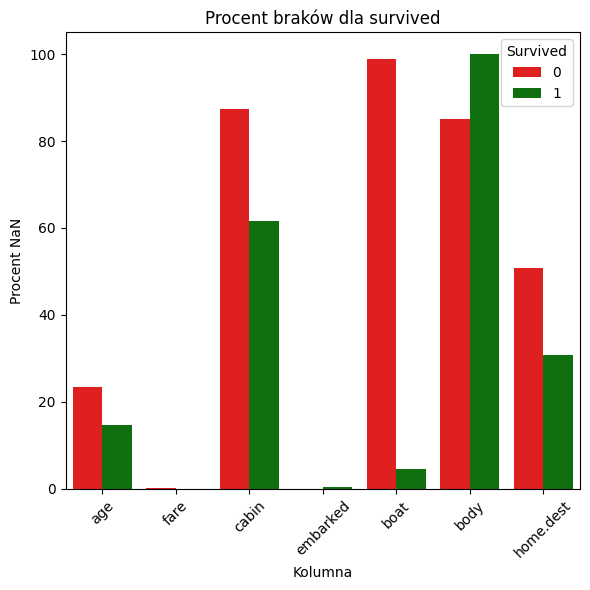

In [6]:
nan_cols = [col for col in titanic_df.columns if titanic_df[col].isnull().sum() > 0]

plot_data = []

for col in nan_cols:
    missing_by_survived = titanic_df[col].isnull().groupby(titanic_df['survived']).mean() * 100
    for survived_val, missing_percent in missing_by_survived.items():
        plot_data.append({
            'Column': col,
            'Survived': survived_val,
            'Missing %': missing_percent
        })

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(6, 6))
sns.barplot(data=plot_df, x='Column', y='Missing %', hue='Survived', palette=['red', 'green'])
plt.title('Procent brakujących wartości według statusu przeżycia')
plt.ylabel('Procent NaN')
plt.xlabel('Kolumna')
plt.xticks(rotation=45)
plt.title('Procent braków dla survived')
plt.tight_layout()
plt.show()


## Korelacja

In [7]:
corr_df = titanic_df.copy()

nan_cols = []

for col in corr_df:
    if corr_df[col].isnull().sum() > 0:
        new_col = f'is_{col}'
        corr_df[new_col] = np.where(titanic_df[col].isnull(), 0, 1)
        nan_cols.append(new_col)

corr_df['is_male'] = np.where(corr_df['sex'] == 'male', 1, 0)
corr_df['is_1st_class'] = np.where(corr_df['pclass'] == 1, 1, 0)
corr_df['is_2nd_class'] = np.where(corr_df['pclass'] == 2, 1, 0)
corr_df['is_3rd_class'] = np.where(corr_df['pclass'] == 3, 1, 0)

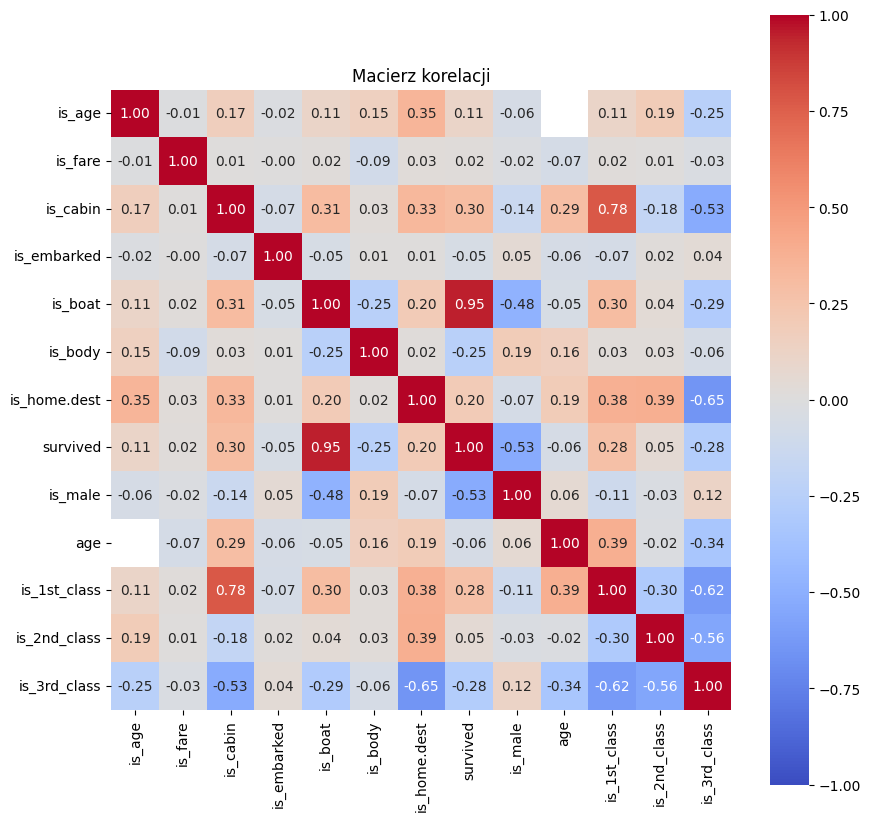

In [8]:
corr_columns = nan_cols.copy() + ['survived', 'is_male', 'age', 'is_1st_class', 'is_2nd_class', 'is_3rd_class']

corr_matrix = corr_df[corr_columns].corr().round(2)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, square=True)
plt.title('Macierz korelacji')
plt.show()

# 3. Brakujące wartości - Wnioski
Kolumny z brakującymi wartościami:<br>

`age`, `fare`, `cabin`, `embarked`, `boat`, `body`, `home.dest`

## Missing Completely At Random (MCAR)

- `fare` - prawie nigdy nie jest brakująca, więc pewnie przypadkowo
- `embarked` - rzadko NaN, pewnie błąd

## Missing At Random (MAR)

- `age`: 
  - brak częściej u osób które nie przeżyły - czyli osoby "słabsze" (dzieci, starsze osoby) albo "gorsze" (trzecia klasa) mogły nie mieć zawsze wpisane wieku

- `body` - mała ujemna korelacja z `survived` (numer ciała jest tylko dla osób martwych), czyli braki wynikają bezpośrednio z `survived`

## Missing Not At Random (MNAR)

- `boat`:
  - Wysoka dodatnia korelacja z `survived` - bez łodzi trudno było, przeżyć więc jej brak niemal zawsze oznaczał śmierć
  - Wysoka ujemna korelacja z `is_male` - kobiety i dzieci mają pierwszeństwo podczas ewakuacji
  - Dodatnia korelacja z `is 1st class` - pierwsza klasa miała pierwszeństwo podczas ewakuacji
  - Ujemna korelacja z `is 3rd class` - trzecia klasa nie miała pierwszeństwa podczas ewakuacji więc brakło dla nich łodzi
- `cabin`:
  - Brak częściej u pasażerów, którzy nie przeżyli
  - Wysoka dodatnia korelacja z `is_1st_class` i ujemna z `is_3rd_class`. Wnioski? Oczywiste. W pierwszej klasie kabiny praktycznie zawsze przydzielane, w trzeciej już nie tak często
class`
- `home.dest`- wysoka ujemna korelacja z `is 3rd class`, czyli można sądzić, że wyższe klasy miały lepiej udokumentowane docelowe miejsce podróży


# Odpowiedź na pytanie
>Brakujące wartości powinny być użyte do stworzenia nowych cech, które mogą wyjaśniać inne zjawiska.